In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Least Squares Approximation using SVD

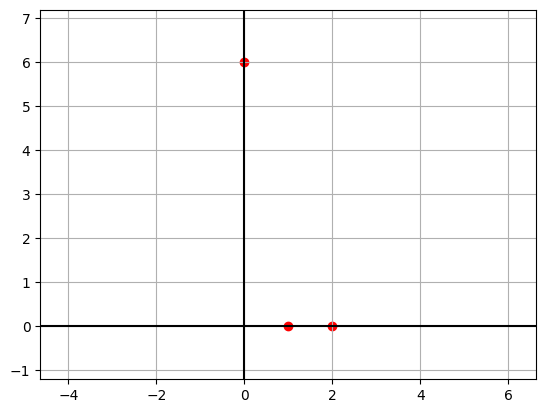

In [2]:
points = np.array([
    [0, 6],
    [1, 0],
    [2, 0],
])
x = points[:, 0]
y = points[:, 1]

plt.figure()
plt.scatter(x, y, color="red", label="Points")

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.axis("equal")
plt.margins(x=0.2, y=0.2)
plt.grid(True)
plt.show()

### Equation for a line: $y = c + mx$.

$$
\begin{flalign*}
A \begin{bmatrix} c \\ m \end{bmatrix} = y\\
&&
\end{flalign*}
$$

In [3]:
A = np.column_stack([np.ones_like(x), x])
print("Matrix A:")
print(A)
print("Vector y:")
print(y)

Matrix A:
[[1 0]
 [1 1]
 [1 2]]
Vector y:
[6 0 0]


### Apply SVD Decomposition

$$
\begin{flalign*}
x = V \Sigma^{+} U^T b
&&\end{flalign*}
$$
Where $\Sigma^{+}$ is inverse of $\Sigma$

In [4]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Compute pseudoinverse manually via SVD
S_inv = np.diag(1 / S)
A_pinv = Vt.T @ S_inv @ U.T

# Least squares solution
x = A_pinv @ y

print("Solution:", x)

Solution: [ 5. -3.]


## Let's build a Linear Regression model using SVD

$$
\begin{flalign*}
y = c_0 + c_1 * x_1 + c_2 * x_2 ... c_n * x_n
&&\end{flalign*}
$$

In [5]:
np.ones((A.shape[0], 1))

array([[1.],
       [1.],
       [1.]])

In [6]:
class MyLinearRegression:
    def fit(self, X, y):
        # Add intercept dimension (c_0) to the left
        A = np.hstack([np.ones((X.shape[0], 1)), X])
        
        U, S, Vt = np.linalg.svd(A, full_matrices=False)
        S_inv = np.diag(1 / S)
        A_pinv = Vt.T @ S_inv @ U.T
        x = A_pinv @ y

        self.weights = x

    def predict(self, X):
        A = np.hstack([np.ones((X.shape[0], 1)), X])
        y_pred = A @ self.weights
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        
        return 1 - ss_res / ss_tot

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

my_model = MyLinearRegression()
my_model.fit(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 score for my model:", my_model.score(X_test, y_test))
print("R^2 score for scikit learn LinearRegression:", model.score(X_test, y_test))
print("Diff:", my_model.score(X_test, y_test) - model.score(X_test, y_test))

R^2 score for my model: 0.5983289892011474
R^2 score for scikit learn LinearRegression: 0.5983289892011467
Diff: 6.661338147750939e-16
